- 데이터셋 분석 목적
    1. 등록된 학생정보를 통하여 학업에 중요한 영향을 미치는 요인을 파악하여 학업 중퇴 및 실패를 줄여보자!
    2. 개인별 학업 진행상황을 파악하고 성취도를 더 높이기 위한 교육 및 활동을 설계하자!
    3. 인구통계정보를 기반으로 특정 지역이나 사회계층적으로 고등교육에 접근하기 어려운 사람들을 위한 방법을 설계하자!
- 진행방법
    1. 제공된 데이터를 불러와 데이터 특성 확인하기
    2. 데이터 확인 후 목적에 맞는 가설을 세워 데이터 분석 후 가설 검증하기(2개)
    3. 학업 중퇴/졸업 예측 모델링진행(데이터 전처리, 특성선택, 모델선택 및 하이퍼파라미터 튜닝 등)
    4. 가설검증결과와 모델링 결과 분석 및 시각화

In [114]:
# 데이터 불러오기
import pandas as pd
data = pd.read_csv('data/data_students.csv')
data

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Daytime/evening attendance
0,single,17,5,Animation and Multimedia Design,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime
1,single,15,1,Tourism,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,daytime
2,single,1,5,Communication Design,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime
3,single,17,2,Journalism and Communication,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,daytime
4,married,39,1,Social Service (evening attendance),Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and Communication,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Personal Services, Security and Safety Workers...",...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,daytime
4420,single,1,2,Journalism and Communication,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,daytime
4421,single,1,1,Nursing,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,daytime
4422,single,1,1,Management,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction and ...",...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,daytime


In [115]:
# 데이터 정보 확인
data.info()
# DataFrame의 기본 정보(열 이름, 비누락 값 수, 데이터 타입 등) 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Previous qualification                          4424 non-null   object 
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   object 
 7   Mother's qualification                          4424 non-null   object 
 8   Father's qualification                          4424 non-null   object 
 9   Mother's occupation                      

In [116]:
# 데이터 통계 확인
data.describe()
# 수치형 열에 대한 기본 통계(개수, 평균, 표준편차, 최소값, 최대값 등) 출력

,Application mode,Application order,Previous qualification (grade),Admission grade,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,0.0,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,132.613314,126.978119,23.265145,NaN,0.709991,6.270570,8.299051,4.706600,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,13.188332,14.482001,7.587816,NaN,2.360507,2.480178,4.179106,3.094238,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,95.000000,95.000000,17.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,125.000000,117.900000,19.000000,NaN,0.000000,5.000000,6.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,133.100000,126.100000,20.000000,NaN,0.000000,6.000000,8.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,140.000000,134.800000,25.000000,NaN,0.000000,7.000000,10.000000,6.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,190.000000,190.000000,70.000000,NaN,20.000000,26.000000,45.000000,26.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [117]:
# 결측치 확인
data.isnull().sum()
# 각 열의 결측치 개수 확인

Marital status                                       0
Application mode                                     0
Application order                                    0
Course                                               0
Previous qualification                               0
Previous qualification (grade)                       0
Nacionality                                          0
Mother's qualification                               0
Father's qualification                               0
Mother's occupation                                  0
Father's occupation                                  0
Admission grade                                      0
Displaced                                            0
Educational special needs                            0
Debtor                                               0
Tuition fees up to date                              0
Gender                                               0
Scholarship holder                                   0
Age at enr

In [118]:
data = data.drop('International', axis=1)
# 'International' 열 제거

In [119]:
data
# 수정된 DataFrame 확인

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Daytime/evening attendance
0,single,17,5,Animation and Multimedia Design,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime
1,single,15,1,Tourism,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,daytime
2,single,1,5,Communication Design,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime
3,single,17,2,Journalism and Communication,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,daytime
4,married,39,1,Social Service (evening attendance),Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and Communication,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Personal Services, Security and Safety Workers...",...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,daytime
4420,single,1,2,Journalism and Communication,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,daytime
4421,single,1,1,Nursing,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,daytime
4422,single,1,1,Management,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction and ...",...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,daytime


- 데이터셋 분석 목적
    1. 등록된 학생정보를 통하여 학업에 중요한 영향을 미치는 요인을 파악하여 학업 중퇴 및 실패를 줄여보자!
    2. 개인별 학업 진행상황을 파악하고 성취도를 더 높이기 위한 교육 및 활동을 설계하자!
    3. 인구통계정보를 기반으로 특정 지역이나 사회계층적으로 고등교육에 접근하기 어려운 사람들을 위한 방법을 설계하자!
- 진행방법
    1. 제공된 데이터를 불러와 데이터 특성 확인하기
    2. 데이터 확인 후 목적에 맞는 가설을 세워 데이터 분석 후 가설 검증하기(2개)
    3. 학업 중퇴/졸업 예측 모델링진행(데이터 전처리, 특성선택, 모델선택 및 하이퍼파라미터 튜닝 등)
    4. 가설검증결과와 모델링 결과 분석 및 시각화

In [120]:
# 데이터 분할
# 특성(X)과 타겟(y)을 분리하고, 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
# 데이터 전처리
# 수치형, 범주형 특성 구분
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [122]:
# 수치형과 범주형 특성 목록 확인
num_features, cat_features

(Index(['Application mode', 'Application order',
        'Previous qualification (grade)', 'Admission grade',
        'Age at enrollment', 'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP'],
       dtype='object'),
 Index(['Marital status', 'Course', 'Previous qualification', 'Nacionality',
        'Mother's qualification', 'Father's qualification',
        'Mother's occupation', 'Father's occupation', 'Displaced',


In [123]:
# 수치형 데이터 전처리
# 수치형 데이터의 결측치를 중앙값으로 대체
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_features]), columns=num_features, index=X_train.index)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_features]), columns=num_features, index=X_test.index)

In [124]:
# 수치형 데이터를 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns=num_features, index=X_train_num.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num), columns=num_features, index=X_test_num.index)

In [125]:
# 범주형 데이터 전처리
# 범주형 데이터의 결측치를 'missing'으로 대체
from sklearn.preprocessing import OneHotEncoder
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_features]), columns=cat_features, index=X_train.index)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_features]), columns=cat_features, index=X_test.index)

In [126]:
from sklearn.preprocessing import OneHotEncoder

# 범주형 데이터 전처리
# 범주형 데이터를 원-핫 인코딩
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat_encoded = pd.DataFrame(onehot.fit_transform(X_train_cat), columns=onehot.get_feature_names_out(cat_features), index=X_train.index)
X_test_cat_encoded = pd.DataFrame(onehot.transform(X_test_cat), columns=onehot.get_feature_names_out(cat_features), index=X_test.index)

In [127]:
# 전처리된 데이터 결합
# 전처리된 수치형 데이터와 범주형 데이터를 결합
X_train_preprocessed = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [128]:
# 전처리된 훈련 데이터 확인
X_train_preprocessed

,Application mode,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),...,Debtor_no,Debtor_yes,Tuition fees up to date_no,Tuition fees up to date_yes,Gender_female,Gender_male,Scholarship holder_no,Scholarship holder_yes,Daytime/evening attendance_daytime,Daytime/evening attendance_evening
3691,-0.091117,2.469511,-0.191029,-0.605736,0.367490,-0.301579,-0.500859,0.648623,-1.206052,-0.132999,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1844,-1.011874,3.226726,0.035727,-0.494742,-0.564110,0.565356,0.311643,-0.060882,0.747185,0.503392,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
613,-0.091117,0.955080,-1.098051,-0.612673,-0.431024,-0.301579,-0.500859,0.648623,-0.229434,0.073957,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2974,-1.011874,-0.559351,-0.644540,-0.897096,-0.564110,-0.301579,-2.532115,-1.952897,-1.531592,-2.202564,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1611,-0.148664,2.469511,0.111312,-0.203382,-0.697196,-0.301579,-0.500859,0.648623,0.096106,0.487870,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,-1.011874,0.197864,0.111312,0.060229,-0.697196,0.131888,-0.094608,-0.060882,0.421645,0.221783,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
466,-1.011874,-0.559351,0.035727,0.309967,-0.431024,-0.301579,-0.094608,0.175619,0.096106,0.763812,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3092,-1.011874,-0.559351,-2.458586,-0.973405,-0.031767,-0.301579,-0.094608,-0.533886,0.421645,0.729320,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3772,-1.011874,1.712295,-0.417784,-0.446182,-0.564110,-0.301579,-0.094608,-0.533886,0.421645,0.591349,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [129]:
# max_iter를 증가시켜 더 많은 반복을 허용
# 로지스틱 회귀 모델 학습 및 정확도 평가
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# max_iter를 증가시켜 더 많은 반복을 허용
lr = LogisticRegression(random_state=30, max_iter=1000)
lr.fit(X_train_preprocessed, y_train)
y_pred = lr.predict(X_test_preprocessed)
accuracy_score(y_test, y_pred)

0.7643072289156626

In [130]:
# 모델 평가
# 분류 보고서 출력 (정밀도, 재현율, F1-score 등)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Dropout       0.80      0.79      0.79       441
    Enrolled       0.56      0.34      0.42       245
    Graduate       0.79      0.91      0.84       642

    accuracy                           0.76      1328
   macro avg       0.71      0.68      0.69      1328
weighted avg       0.75      0.76      0.75      1328



<Figure size 800x600 with 0 Axes>

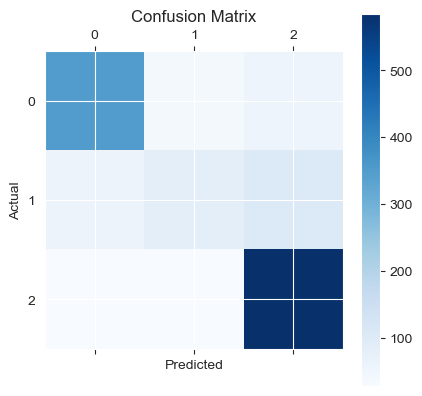

In [131]:
# 혼동 행렬 시각화
# 로지스틱 회귀 모델의 계수를 기반으로 특성 중요도 시각화
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


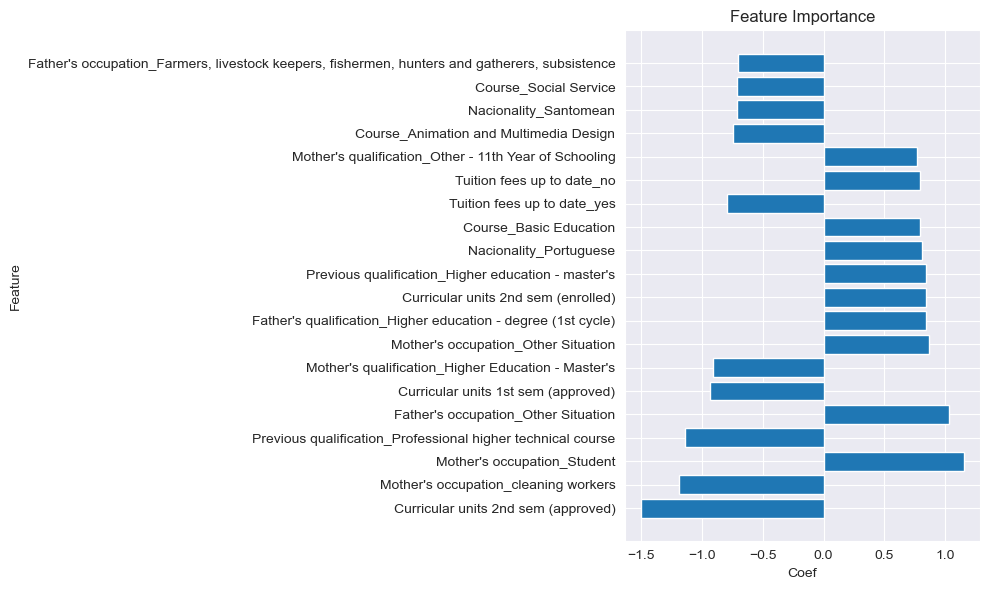

In [132]:
# 특성 중요도 시각화
import matplotlib.pyplot as plt

feature_names = X_train_preprocessed.columns
coefficients = lr.coef_[0]

# 절대값 기준으로 상위 20개 선택
top_features = sorted(zip(X_train_preprocessed.columns, lr.coef_[0]), key=lambda x: -abs(x[1]))[:20]

plt.figure(figsize=(10, 6))
plt.barh(*zip(*top_features))
plt.xlabel('Coef')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [133]:
# 상위 20개 특성 출력
for i in top_features:
    print(i[0])


Curricular units 2nd sem (approved)
Mother's occupation_cleaning workers
Mother's occupation_Student
Previous qualification_Professional higher technical course
Father's occupation_Other Situation
Curricular units 1st sem (approved)
Mother's qualification_Higher Education - Master's
Mother's occupation_Other Situation
Father's qualification_Higher education - degree (1st cycle)
Curricular units 2nd sem (enrolled)
Previous qualification_Higher education - master's
Nacionality_Portuguese
Course_Basic Education
Tuition fees up to date_yes
Tuition fees up to date_no
Mother's qualification_Other - 11th Year of Schooling
Course_Animation and Multimedia Design
Nacionality_Santomean
Course_Social Service
Father's occupation_Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
